# SoSciPy
### Visualise
The main aim of SoSciPy is to create a go to tool for quick quantiative social science. As one of the basic needs for this discipline is to visualise what is happening we have added a commonly used visual vocabulary for quick analysis.

In [13]:
#Run if you don't have soscipy installed
!pip install --upgrade --force-reinstall soscipy

  Attempting uninstall: soscipy
    Found existing installation: soscipy 0.0.20
    Uninstalling soscipy-0.0.20:
      Successfully uninstalled soscipy-0.0.20


1. Divergence graph

In [1]:
import os
import pandas as pd
from soscipy.plot import deviation

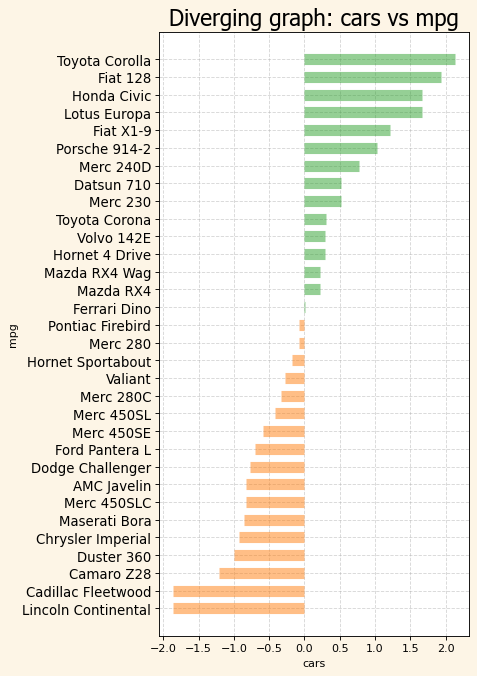

In [5]:
#Usage
#Read the file. Here we are taking example of mtcars.csv, a famous dataset on the milage of different cars
path = "/".join(os.getcwd().split("/")[:5])+"/data"+"/"+'mtcars.csv'
df = pd.read_csv(path)
# Remove the comment in the box below to print the column names
# print(df.columns)

#Soscipy deviation module to import data and plot a graph
graph = deviation.diverge_graph(df=df,labels='cars',val='mpg')
graph.plot()

2. Implementation

In [305]:
class diverge_graph:
    def __init__(self,df,labels,val,xlabel=None,ylabel=None,TITLE=None,figsize=(5,10),dpi=80,tfont=20,lfont=12,linewidth=10,cmap='RdYlGn'):
        self.labels = df[labels]
        if not xlabel:
            self.xlabel = labels
        else:
            self.xlabel = xlabel
        
        if not ylabel:
            self.ylabel = val
        else:
            self.ylabel = ylabel
        
        self.values = df[val].values
        self.figsize = figsize
        self.plt = plt
        self.tfont=tfont
        self.lfont=lfont
        self.dpi = dpi
        self.linewidth=linewidth
        if not TITLE:
            self.chart_title = f"Diverging graph: {self.xlabel} vs {self.ylabel}"
        else:
            self.chart_title = TITLE
        self.z_scores = self.__z_score__(self.values)
        
    def __z_score__(self,val):
        return (val-val.mean())/val.std()
    
    def __color__(self, __range):
        return ['C1' if val<0 else 'C2' for val in __range]
    
    def plot(self):
        order = np.argsort(self.z_scores)
        self.z_scores.sort()
        self.values = [self.values[i] for i in order]
        self.labels = [self.labels[i] for i in order]
        
        self.plt.figure(figsize=self.figsize,dpi=self.dpi,facecolor='oldlace')
        self.plt.hlines(y=range(len(self.labels)),
                   xmin=0,
                   xmax= self.z_scores,
                   color = self.__color__(self.z_scores),
                   alpha=0.5,
                   linewidth=self.linewidth)
        self.plt.gca().set(ylabel=self.ylabel, xlabel=self.xlabel)
        self.plt.yticks(range(len(self.labels)),self.labels,fontsize=self.lfont)
        self.plt.title(self.chart_title,fontdict={'size':self.tfont,'family':'Tahoma'})
        self.plt.grid(linestyle='--',alpha=0.5)
        self.plt.show()